In [6]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [ ]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [8]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force

Enter verification code: ··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [9]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print('Files in Drive:')
!ls drive/Datasets




Files in Drive:
dog.jpg  fer2013.csv


In [ ]:
#import cv2
import sys
import os
#import glob
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("drive/Datasets/fer2013.csv")




In [12]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['pixels'], df['emotion'], test_size=0.3, random_state=30)

In [ ]:
df_train=pd.DataFrame({'index':X_train.index, 'value':X_train.values})

In [ ]:
df_test=pd.DataFrame({'index':X_test.index, 'value':X_test.values})

In [17]:
df_test.head()

,index,value
0,26449,232 231 228 223 225 225 220 217 179 170 186 19...
1,26627,134 134 128 124 130 130 131 130 122 123 115 11...
2,28952,52 4 34 69 94 108 127 141 154 160 170 177 184 ...
3,23262,255 255 255 255 255 252 255 236 139 105 116 12...
4,4987,229 231 232 233 233 235 220 136 139 130 118 14...


In [ ]:
X_train=df_train['value']

In [ ]:
X_test=df_test['value']

In [ ]:
images=[]

for i in range(len(X_train)):
    image_string = X_train[i]
    image = [int(x) for x in image_string.split()]
    image=np.array(image,dtype='float32')
    image=image.reshape((48,48,1))
    images.append(image)

In [ ]:
images_test=[]

for i in range(len(X_test)):
    image_string = X_test[i]
    image = [int(x) for x in image_string.split()]
    image=np.array(image,dtype='float32')
    image=image.reshape((48,48,1))
    images_test.append(image)

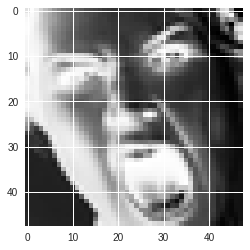

In [22]:
plt.imshow(images_test[2].reshape((48,48)))
plt.show()

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [24]:
y_train_hot=convert_to_one_hot(y_train,7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [25]:
y_test_hot=convert_to_one_hot(y_test,7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [26]:
(y_train_hot[:128].shape)

(128, 7)

In [ ]:
#images.shape[1:]

In [30]:
images=np.array(images)
images_test=np.array(images_test)
images_test.reshape((10767,2304)).shape

(10767, 2304)

In [31]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('sigmoid'))

In [ ]:
# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 64)        18496     
__________

In [48]:
images_test.shape

(10767, 48, 48, 1)

In [43]:
history=model.fit(images, y_train_hot, epochs=300, verbose=2, batch_size=1024,
                                    initial_epoch=0, shuffle=False)




Epoch 1/300
 - 8s - loss: 2.5548 - acc: 0.1363
Epoch 2/300
 - 8s - loss: 2.0287 - acc: 0.1375
Epoch 3/300
 - 8s - loss: 1.8993 - acc: 0.1577
Epoch 4/300
 - 8s - loss: 1.8404 - acc: 0.2293
Epoch 5/300
 - 8s - loss: 1.8042 - acc: 0.2514
Epoch 6/300
 - 8s - loss: 1.7651 - acc: 0.2882
Epoch 7/300
 - 8s - loss: 1.7393 - acc: 0.3022
Epoch 8/300
 - 8s - loss: 1.7050 - acc: 0.3230
Epoch 9/300
 - 8s - loss: 1.6662 - acc: 0.3407
Epoch 10/300
 - 8s - loss: 1.6342 - acc: 0.3520
Epoch 11/300
 - 8s - loss: 1.6193 - acc: 0.3651
Epoch 12/300
 - 8s - loss: 1.5967 - acc: 0.3706
Epoch 13/300
 - 8s - loss: 1.5606 - acc: 0.3872
Epoch 14/300
 - 8s - loss: 1.5440 - acc: 0.3907
Epoch 15/300
 - 8s - loss: 1.5191 - acc: 0.4036
Epoch 16/300
 - 8s - loss: 1.5100 - acc: 0.4089
Epoch 17/300
 - 8s - loss: 1.4885 - acc: 0.4187
Epoch 18/300
 - 8s - loss: 1.4674 - acc: 0.4264
Epoch 19/300
 - 8s - loss: 1.4483 - acc: 0.4370
Epoch 20/300
 - 8s - loss: 1.4301 - acc: 0.4500
Epoch 21/300
 - 8s - loss: 1.4079 - acc: 0.4582
E

In [49]:
scores = model.evaluate(images_test, y_test_hot, verbose=2)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


Accuracy: 58.03%


In [51]:
# serialize model to JSON
model_json = model.to_json()
with open("drive/Datasets/Fac_exp.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/Datasets/Fac_exp.h5")
print("Saved model to disk")

Saved model to disk


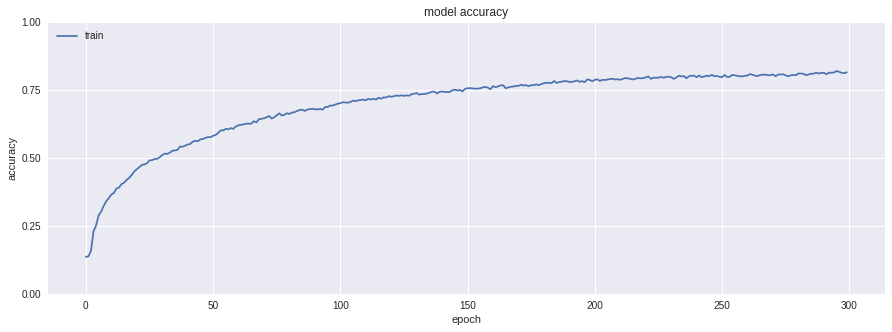

In [53]:
# summarize history for accuracy
ynum=np.linspace(0,1,5)
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yticks(ynum) 

plt.legend(['train', 'test'], loc='upper left')
plt.show()

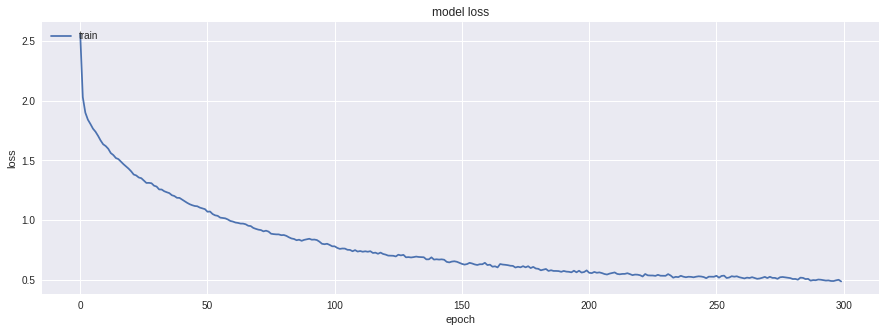

In [54]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()